<a href="https://colab.research.google.com/github/vikas3009/Machine-Learning/blob/main/cardio_vascular_disease_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing the libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score


# Importing the dataset

In [3]:
df = pd.read_csv('cardio_train.csv',sep=';')
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


## Analysis of Data

In [4]:
df.shape

(70000, 13)

In [5]:
df.keys()

Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [7]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
df.isna().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

## Data Visualization

### Correlation Matrix

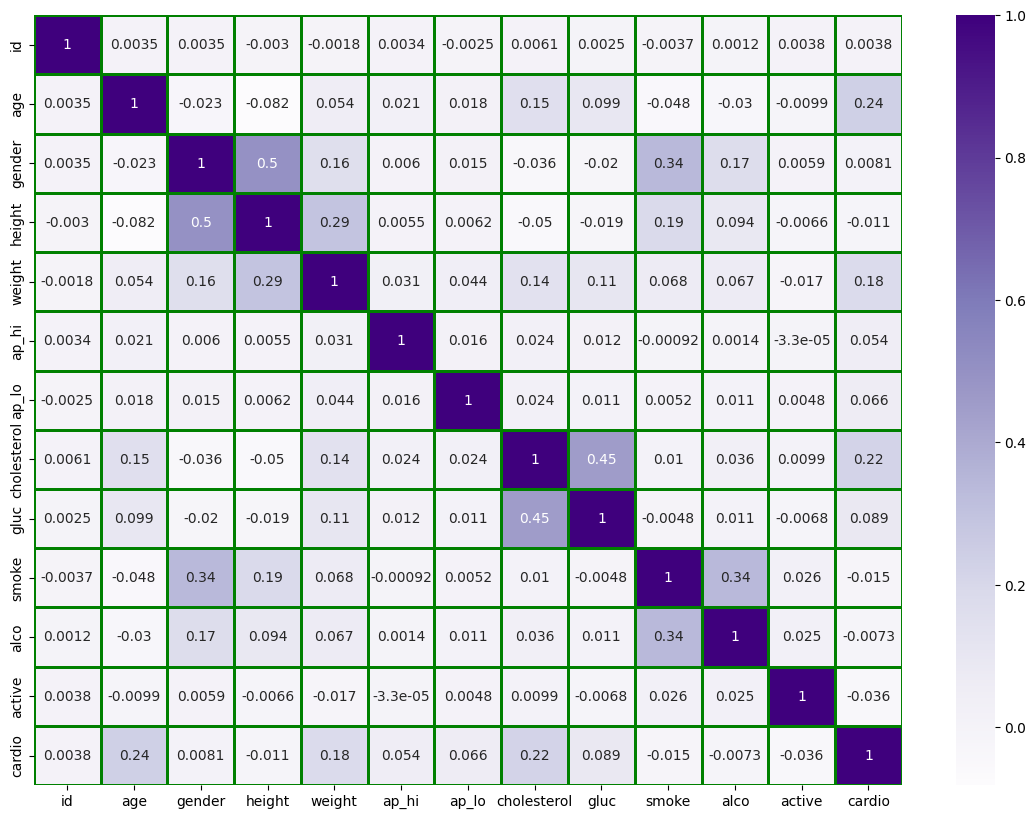

In [9]:
plt.figure(figsize = (14, 10))
sns.heatmap(df.corr(), cmap='Purples',annot=True, linecolor='Green', linewidths=1.0)
plt.show()

### Pairplot

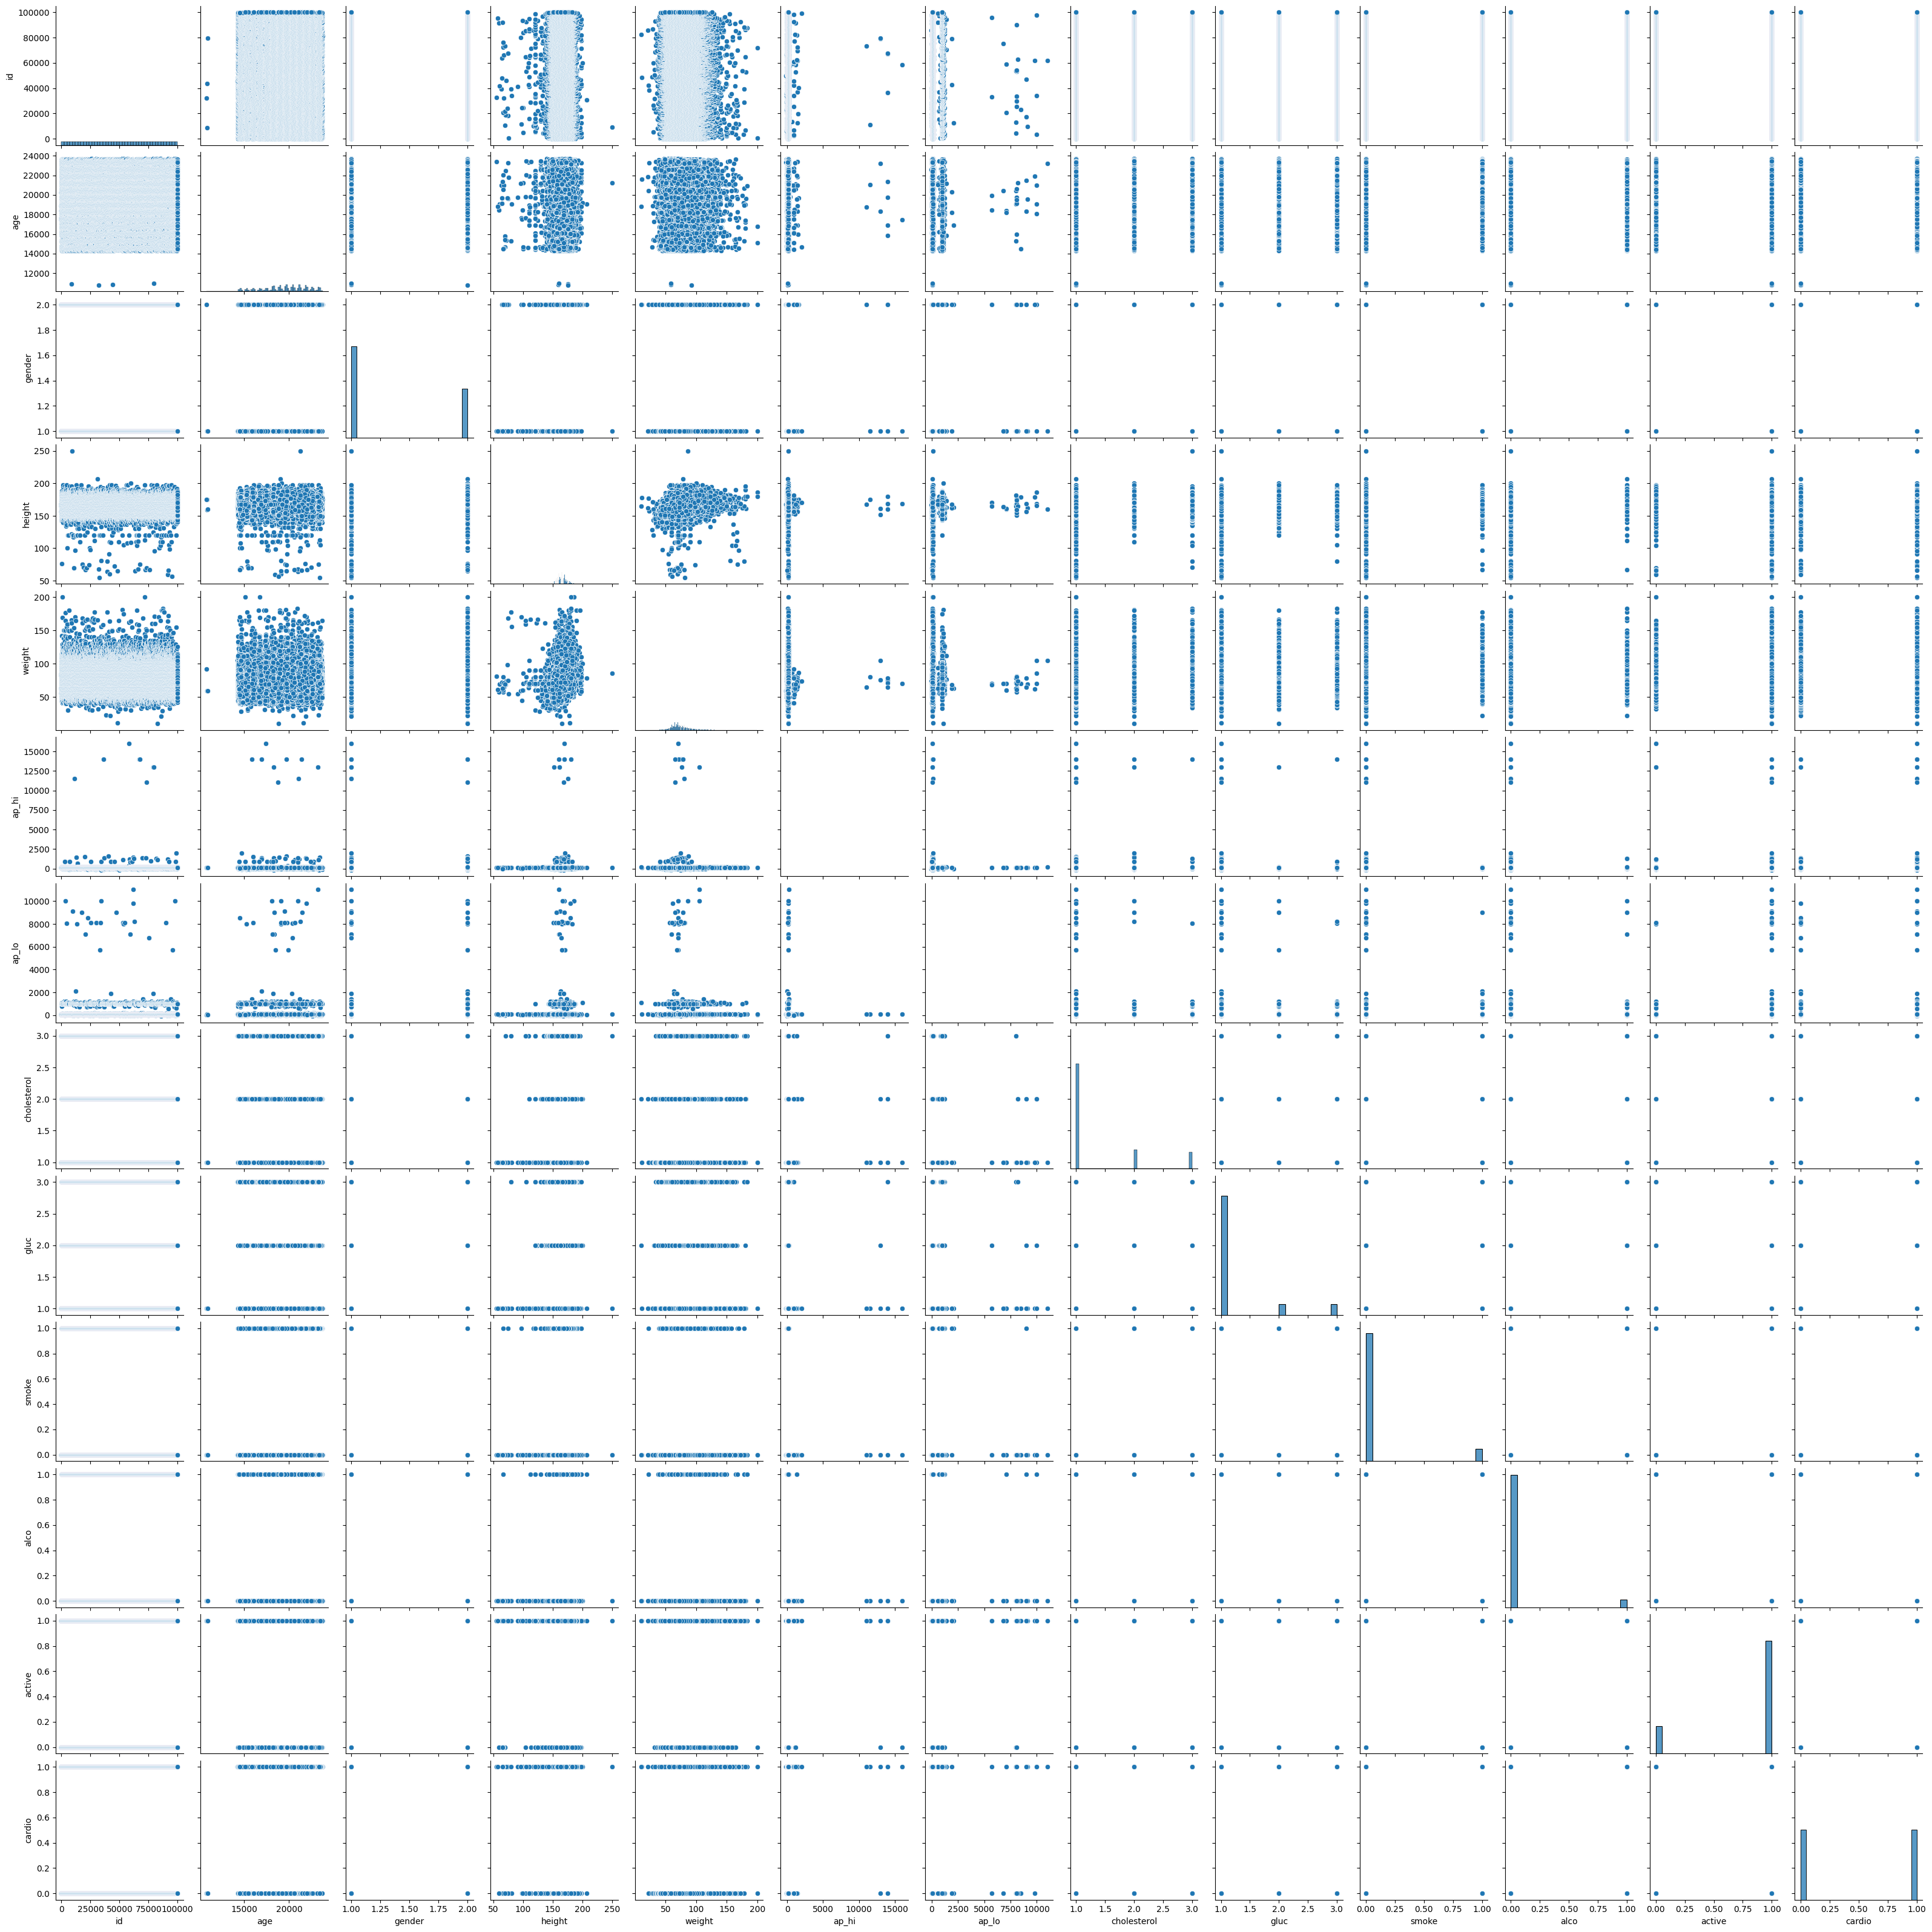

In [10]:
sns.pairplot(df)
plt.show()

# Data Preparation


### Separating the data into feature and target data.


In [11]:
X = df.iloc[:,1:12]
y = df.iloc[:,12:].values

In [12]:
X.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
0,18393,2,168,62.0,110,80,1,1,0,0,1
1,20228,1,156,85.0,140,90,3,1,0,0,1
2,18857,1,165,64.0,130,70,3,1,0,0,0
3,17623,2,169,82.0,150,100,1,1,0,0,1
4,17474,1,156,56.0,100,60,1,1,0,0,0


#splitting dataset into training set and test set

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=21)

##feature scaling

In [14]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [15]:
y_train=y_train.reshape(-1,)

#KNN

In [16]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

###Predict the test set results

In [17]:
y_pred = classifier.predict(X_test)

In [18]:
accuracy_score(y_test,y_pred)

0.6398095238095238

#Random Forest

In [19]:
from sklearn.ensemble import RandomForestClassifier
classifier =RandomForestClassifier(n_estimators=20)
classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=20)

###Predict the test set results

In [20]:
y_pred = classifier.predict(X_test)

In [21]:
accuracy_score(y_test,y_pred)

0.7079047619047619

# Decision Tree

In [22]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 8)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=8)

###Predict the test set results

In [23]:
y_pred = classifier.predict(X_test)

In [24]:
accuracy_score(y_test,y_pred)

0.640095238095238

#SVC

In [25]:
from sklearn.svm import SVC


classifier = SVC(kernel = 'linear', random_state = 0 ,probability=True)
classifier.fit(X_train, y_train)

SVC(kernel='linear', probability=True, random_state=0)

In [35]:
y_pred = classifier.predict(X_test)

In [27]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7232380952380952

# logistic regression

In [28]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [29]:
logreg.fit(X_train, y_train)

LogisticRegression()

###Predict the test set results

In [30]:
y_pred = logreg.predict(X_test)

In [31]:
accuracy_score(y_test,y_pred)

0.721047619047619

In [32]:
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix is:\n",cm)

Confusion Matrix is:
 [[8023 2436]
 [3422 7119]]


In [33]:
print("Classification Report is:\n\n",classification_report(y_test,y_pred))

Classification Report is:

               precision    recall  f1-score   support

           0       0.70      0.77      0.73     10459
           1       0.75      0.68      0.71     10541

    accuracy                           0.72     21000
   macro avg       0.72      0.72      0.72     21000
weighted avg       0.72      0.72      0.72     21000



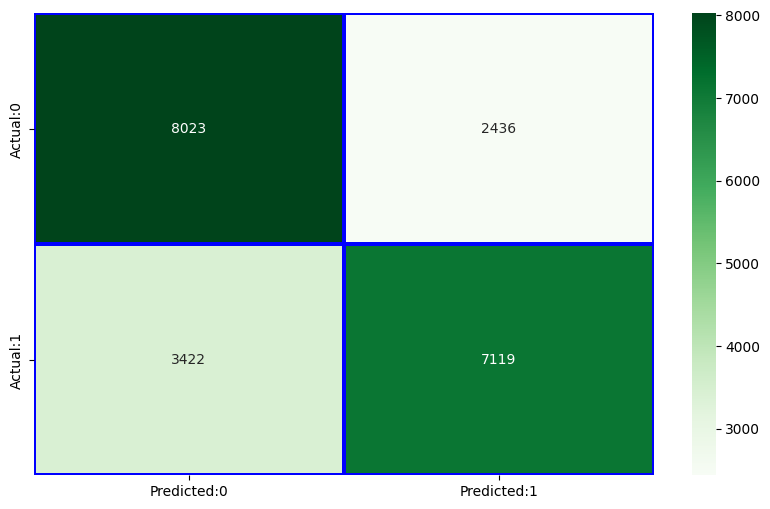

In [34]:
conf_matrix = pd.DataFrame(data = cm,
                           columns = ['Predicted:0', 'Predicted:1'],
                           index =['Actual:0', 'Actual:1'])
plt.figure(figsize = (10, 6))
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = "Greens", linecolor="Blue", linewidths=1.5)
plt.show()